In [17]:
from get_params import get_params
import sys
import os, time
import numpy as np
import pickle
import cv2
from rank import rank
from eval_rankings import * 
from get_features import *
from sklearn.cluster import MiniBatchKMeans
from sklearn.preprocessing import normalize, StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import kneighbors_graph
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.cluster import AffinityPropagation
import warnings
warnings.filterwarnings("ignore")

** GET FEATURES = ** NUM_CLUSTER=4096 i metode=RootSIFT 

In [15]:
params = get_params()

# Change to training set
params['split'] = 'train'

print "Stacking features together..."
# Save features for training set
t = time.time()
X, pca, scaler = stack_features(params)
print "Done. Time elapsed:", time.time() - t
print "Number of training features", np.shape(X)

print "Training codebook..."
t = time.time()
train_codebook(params,X)
print "Done. Time elapsed:", time.time() - t

print "Storing bow features for train set..."
t = time.time()
get_features(params, pca,scaler)
print "Done. Time elapsed:", time.time() - t

params['split'] = 'val'

print "Storing bow features for validation set..."
t = time.time()
get_features(params)
print "Done. Time elapsed:", time.time() - t

Stacking features together...
Done. Time elapsed: 260.595730066
Number of training features (216372, 128)
Training codebook...
Done. Time elapsed: 286.868628979
Storing bow features for train set...
Done. Time elapsed: 266.568962097
Storing bow features for validation set...
Done. Time elapsed: 82.5558521748


**RANK+EVAL_RANK** 

In [18]:
rank(params)
print "Rank realitzat" 

Rank realitzat


In [19]:
ap_list, dict_ = eval_rankings(params)
print 'Precisió Mitjana:', np.mean(ap_list)

Precisió Mitjana: 0.265461240287


** RANKINGS D'ALGUNA IMATGE** 

Imatge amb el MAP més elevat: ajuntament

ajuntament
450
Displaying...


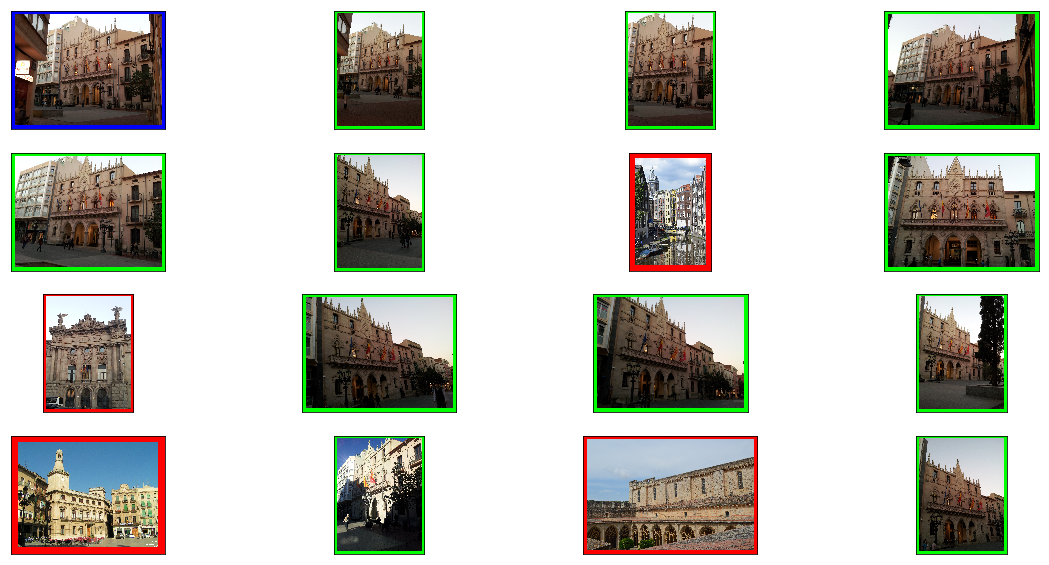

In [20]:
query_id='3302-11063-14946'
single_eval(params,query_id)

Imatge amb el MAP més baix: estació_nord

estacio_nord
450
Displaying...


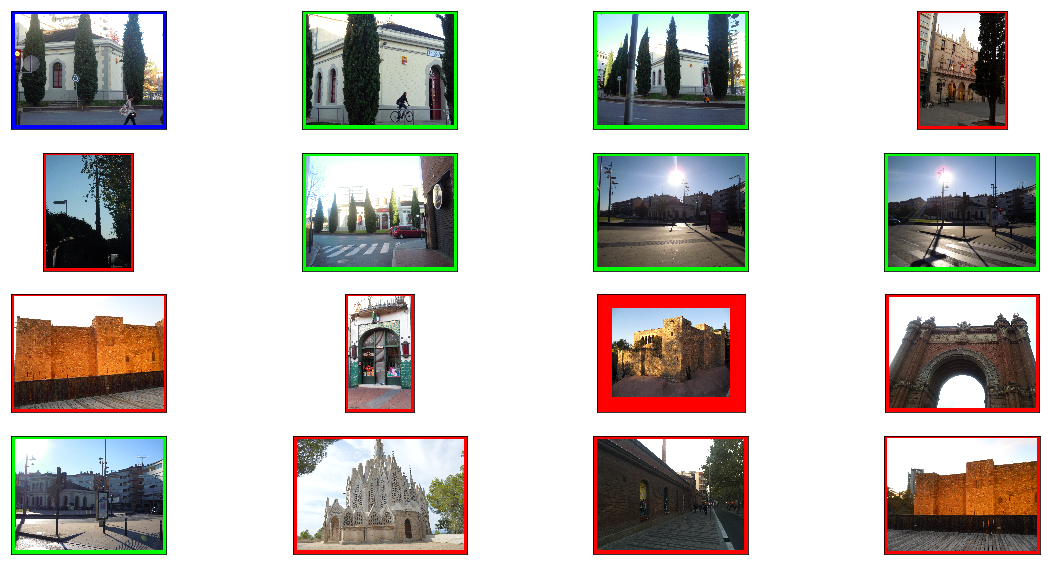

In [21]:
query_id='29911-27486-31219'
single_eval(params,query_id)